In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [2]:
df=pd.read_csv('historical_data.csv')
df2=pd.read_csv('fear_greed_index.csv')


In [3]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
df2.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
# rename of the columns
df.columns=df.columns.str.lower().str.replace(' ','_').str.strip()

In [6]:
df.isna().sum()

account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
dtype: int64

In [7]:
df2.isna().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [8]:
df['date']=pd.to_datetime(df["timestamp_ist"], format="%d-%m-%Y %H:%M", errors="coerce").dt.date
df['date']=pd.to_datetime(df['date'])
df['date']

0        2024-12-02
1        2024-12-02
2        2024-12-02
3        2024-12-02
4        2024-12-02
            ...    
211219   2025-04-25
211220   2025-04-25
211221   2025-04-25
211222   2025-04-25
211223   2025-04-25
Name: date, Length: 211224, dtype: datetime64[ns]

In [9]:
df2['date']=pd.to_datetime(df2['date'])
df2['date']


0      2018-02-01
1      2018-02-02
2      2018-02-03
3      2018-02-04
4      2018-02-05
          ...    
2639   2025-04-28
2640   2025-04-29
2641   2025-04-30
2642   2025-05-01
2643   2025-05-02
Name: date, Length: 2644, dtype: datetime64[ns]

In [10]:
merge_data=pd.merge(df,df2,on='date',how='left')

In [11]:
print('historical_data data size', df.shape)
print('Fear_greed dataset size', df2.shape)
print('Merged dataset size', merge_data.shape)

historical_data data size (211224, 17)
Fear_greed dataset size (2644, 4)
Merged dataset size (211224, 20)


In [12]:
print('Sum of Duplicates')
print('historical_data data size', df.duplicated().sum())
print('Fear_greed dataset size', df2.duplicated().sum())
print('Merged dataset size', merge_data.duplicated().sum())

Sum of Duplicates
historical_data data size 0
Fear_greed dataset size 0
Merged dataset size 0


In [13]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values:\n", df.isna().sum())
print("\nData types:\n", df.dtypes)
print("\nSummary stats:\n", df.describe())

Shape: (211224, 17)
Columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'date']

Missing values:
 account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
date                0
dtype: int64

Data types:
 account                     object
coin                        object
execution_price            float64
size_tokens                float64
size_usd                   float64
side                        object
timestamp_ist               object
start_position             float64
direction                   object
closed_pnl        

In [14]:
merge_data.loc[merge_data.isna().any(axis=1)]

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification
727,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.8330,10000.00,28330.00,BUY,26-10-2024 04:44,-32797.51,Close Short,11655.000000,0x4da9426d2bf6ec027d8404152f9bad02010700c745eb...,40671411386,False,2.719680,8.350000e+13,1.730000e+12,2024-10-26,NaN,NaN,NaN
728,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.7110,10797.51,29272.05,BUY,26-10-2024 04:52,-22797.51,Close Short,13901.794130,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671438761,False,2.810115,3.230000e+14,1.730000e+12,2024-10-26,NaN,NaN,NaN
729,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,6908.33,17884.98,BUY,26-10-2024 04:52,-12000.00,Close Short,9737.981968,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,1.716957,1.070000e+15,1.730000e+12,2024-10-26,NaN,NaN,NaN
730,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,529.39,1370.54,BUY,26-10-2024 04:52,-5091.67,Close Short,746.228144,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,0.131570,8.770000e+14,1.730000e+12,2024-10-26,NaN,NaN,NaN
731,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,38.65,100.06,BUY,26-10-2024 04:52,-4562.28,Close Short,54.481040,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,0.009605,9.820000e+14,1.730000e+12,2024-10-26,NaN,NaN,NaN
732,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,4523.63,11711.23,BUY,26-10-2024 04:53,-4523.63,Close Short,6376.508848,0x39ce7efcc1773fd0eec704152fbcb4010100c8beadd4...,40671466136,False,1.124277,9.360000e+14,1.730000e+12,2024-10-26,NaN,NaN,NaN


In [15]:
df2.loc[df2['date']=='2024-10-26']

,timestamp,value,classification,date


In [16]:
# handle Missing Value
merge_data.dropna(inplace=True)


##### Average Profit and loss  by clasification

In [17]:
order = ["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"]

  classification  avg_pnl
0   Extreme Fear    34.54
1  Extreme Greed    67.89
2           Fear    54.29
3          Greed    42.74
4        Neutral    34.31


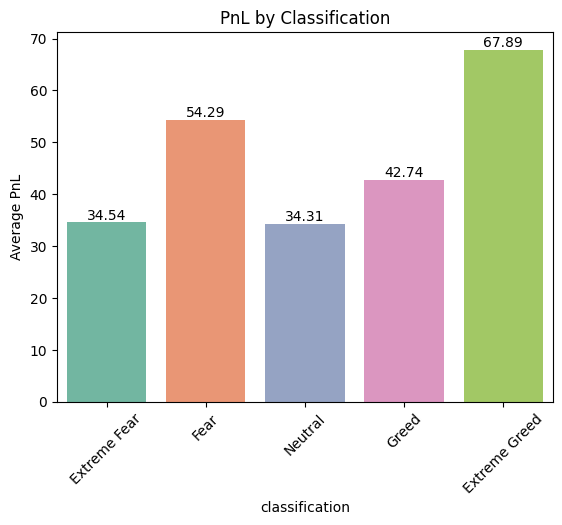

In [18]:
Avg_pnl=merge_data.groupby("classification")["closed_pnl"].mean().round(2).reset_index(name='avg_pnl')
Avg_pnl["classification"] = pd.Categorical(Avg_pnl["classification"], categories=order, ordered=True)
print(Avg_pnl)
ax=sns.barplot(data=Avg_pnl, x=Avg_pnl['classification'], y=Avg_pnl['avg_pnl'], palette='Set2')
plt.xticks(rotation=45)
for bar in ax.containers:
    ax.bar_label(bar)
plt.ylabel("Average PnL")
plt.title("PnL by Classification")
plt.show()



is_win
0    124355
1     86863
Name: count, dtype: Int64


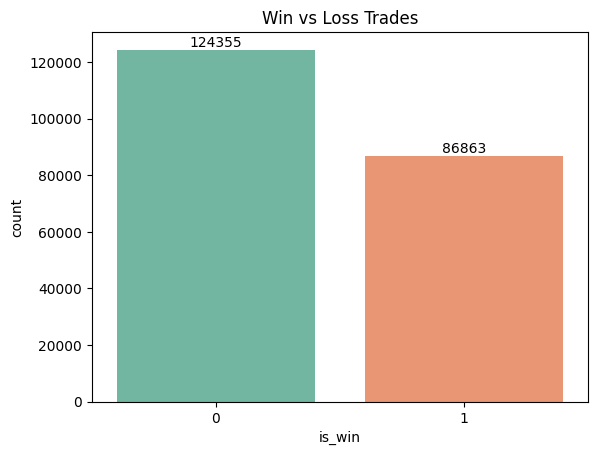

In [24]:
merge_data["is_win"] = merge_data["closed_pnl"] > 0
merge_data['is_win']=merge_data['is_win'].astype('Int64')
print(merge_data['is_win'].value_counts())
ax=sns.countplot(x="is_win", data=merge_data, palette='Set2')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Win vs Loss Trades")
plt.show()

  classification      rate
0   Extreme Fear  0.370607
1  Extreme Greed  0.464943
2           Fear  0.420768
3          Greed  0.384828
4        Neutral  0.396991


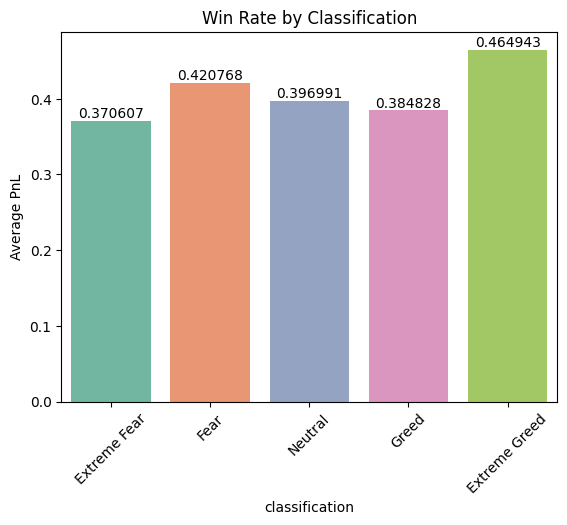

In [25]:
win_rate = merge_data.groupby("classification")["is_win"].mean().reset_index(name='rate')
win_rate["classification"] = pd.Categorical(win_rate["classification"], categories=order, ordered=True)
print(win_rate)

ax=sns.barplot(data=win_rate, x=win_rate['classification'], y=win_rate['rate'], palette='Set2')
plt.xticks(rotation=45)
for bar in ax.containers:
    ax.bar_label(bar)
plt.ylabel("Average PnL")
plt.title("Win Rate by Classification")
plt.show()


Win Rate by Side (%):
       is_win
side        
BUY    27.39
SELL   54.12


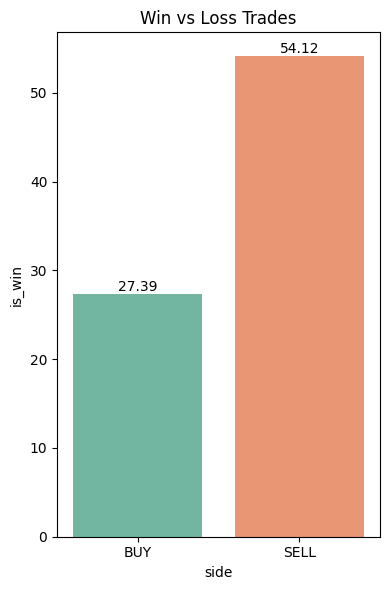

In [26]:
# Side vs Win Rate
pivot_side = (merge_data.pivot_table(values="is_win", index="side", aggfunc="mean") * 100).round(2)
print("\nWin Rate by Side (%):\n", pivot_side)
plt.figure(figsize=(4,6))
ax=sns.barplot(y="is_win", x='side', data=pivot_side, palette='Set2')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Win vs Loss Trades")
plt.tight_layout()
plt.show()

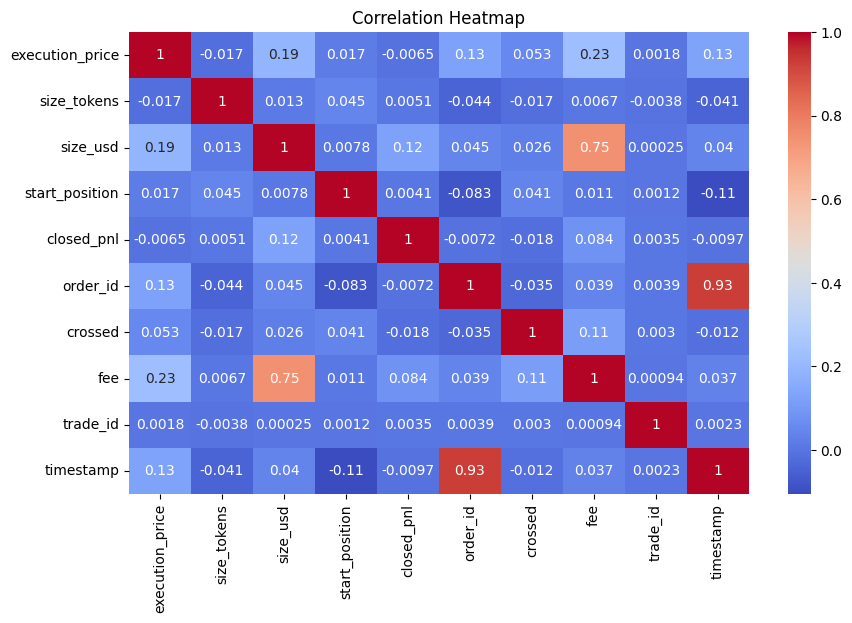

In [27]:
# Correlation heatmap (numerical only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
merge_data

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification,is_win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0


In [29]:
merge_data

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification,is_win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0


In [30]:
merge_data.to_csv('merge_data.csv', index=False)

In [31]:
df1=pd.read_csv('merge_data.csv')
df_copy=df1.copy()

In [32]:
df_copy

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification,is_win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed,0


In [33]:
drop_cols = ["account", "order_id", "trade_id", "timestamp_ist", "timestamp_x", "timestamp_y", "date", "closed_pnl" ]

In [34]:
df_copy = df_copy.drop(columns=[col for col in drop_cols if col in df_copy.columns])
df_copy.columns

Index(['coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'start_position', 'direction', 'transaction_hash', 'crossed', 'fee',
       'value', 'classification', 'is_win'],
      dtype='object')

In [35]:
X=df_copy.drop("is_win", axis=1)
y=df_copy['is_win']
print(X)
print(y)

            coin  execution_price  size_tokens  size_usd  side  \
0           @107           7.9769       986.87   7872.16   BUY   
1           @107           7.9800        16.00    127.68   BUY   
2           @107           7.9855       144.09   1150.63   BUY   
3           @107           7.9874       142.98   1142.04   BUY   
4           @107           7.9894         8.73     69.75   BUY   
...          ...              ...          ...       ...   ...   
211213  FARTCOIN           1.1010       382.20    420.80  SELL   
211214  FARTCOIN           1.1010      2124.10   2338.63  SELL   
211215  FARTCOIN           1.1010       423.40    466.16  SELL   
211216  FARTCOIN           1.1010      3599.80   3963.38  SELL   
211217  FARTCOIN           1.1010      1017.10   1119.83  SELL   

        start_position   direction  \
0             0.000000         Buy   
1           986.524596         Buy   
2          1002.518996         Buy   
3          1146.558564         Buy   
4          1289.4

In [36]:
for col in X.select_dtypes(include=["object", "bool"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

In [37]:
print(X)

        coin  execution_price  size_tokens  size_usd  side  start_position  \
0          4           7.9769       986.87   7872.16     0        0.000000   
1          4           7.9800        16.00    127.68     0      986.524596   
2          4           7.9855       144.09   1150.63     0     1002.518996   
3          4           7.9874       142.98   1142.04     0     1146.558564   
4          4           7.9894         8.73     69.75     0     1289.488521   
...      ...              ...          ...       ...   ...             ...   
211213   122           1.1010       382.20    420.80     1     7546.600000   
211214   122           1.1010      2124.10   2338.63     1     7164.400000   
211215   122           1.1010       423.40    466.16     1     5040.300000   
211216   122           1.1010      3599.80   3963.38     1     4616.900000   
211217   122           1.1010      1017.10   1119.83     1     1017.100000   

        direction  transaction_hash  crossed       fee  value  

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:
comparison=pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':y_pred

})
print(comparison.head(20))

    Actual  Predicted
0        0          0
1        0          1
2        0          0
3        0          1
4        0          0
5        0          0
6        0          0
7        0          0
8        1          0
9        1          0
10       0          0
11       0          0
12       0          0
13       1          0
14       0          0
15       0          0
16       1          1
17       0          1
18       0          1
19       0          1


In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6934949341918379

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76     24848
           1       0.66      0.53      0.59     17396

    accuracy                           0.69     42244
   macro avg       0.69      0.67      0.67     42244
weighted avg       0.69      0.69      0.69     42244


Confusion Matrix:
 [[20154  4694]
 [ 8254  9142]]


In [42]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print("\nConfusion Matrix Breakdown:")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")


Confusion Matrix Breakdown:
True Negative (TN): 20154
False Positive (FP): 4694
False Negative (FN): 8254
True Positive (TP): 9142
